In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('./Uncleaned_DS_jobs/Uncleaned_DS_jobs.csv')

# Drop rows with missing values
data = data.dropna()

# Extracting numerical salary from 'Salary Estimate'
data = data[data['Salary Estimate'] != '-1']  # Remove rows with '-1' as salary estimate
data['Min Salary'] = data['Salary Estimate'].apply(lambda x: int(x.split('-')[0].replace('K','').replace('$','').replace(' ','')))
data['Max Salary'] = data['Salary Estimate'].apply(lambda x: int(x.split('-')[1].split('(')[0].replace('K','').replace('$','').replace(' ','')))
data['Avg Salary'] = (data['Min Salary'] + data['Max Salary']) / 2

# Find the most frequent job titles
top_job_titles = data['Job Title'].value_counts().head(10).index
print(top_job_titles)


Index(['Data Scientist', 'Data Engineer', 'Senior Data Scientist',
       'Machine Learning Engineer', 'Data Analyst', 'Senior Data Analyst',
       'Senior Data Engineer', 'Data Science Software Engineer',
       'ENGINEER - COMPUTER SCIENTIST - RESEARCH COMPUTER SCIENTIST - SIGNAL PROCESSING - SAN ANTONIO OR',
       'Data Scientist - TS/SCI FSP or CI Required'],
      dtype='object', name='Job Title')


In [2]:
# Filter the dataset to include only the top job titles
top_jobs_data = data[data['Job Title'].isin(top_job_titles)]

# Group by job title and calculate average salary
avg_salary_by_job = top_jobs_data.groupby('Job Title')['Avg Salary'].mean().sort_values(ascending=False)
print(avg_salary_by_job)


Job Title
Data Science Software Engineer                                                                      150.375000
ENGINEER - COMPUTER SCIENTIST - RESEARCH COMPUTER SCIENTIST - SIGNAL PROCESSING - SAN ANTONIO OR    150.375000
Senior Data Scientist                                                                               131.105263
Data Scientist                                                                                      125.980712
Senior Data Analyst                                                                                 120.666667
Data Analyst                                                                                        118.666667
Data Engineer                                                                                       114.288462
Senior Data Engineer                                                                                110.300000
Machine Learning Engineer                                                                           10

In [3]:
#Visualize the Impact of Top Job Titles on Salary

C:\Users\samir\AppData\Local\Temp\ipykernel_21088\1132131099.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_by_job.values, y=avg_salary_by_job.index, palette='viridis')


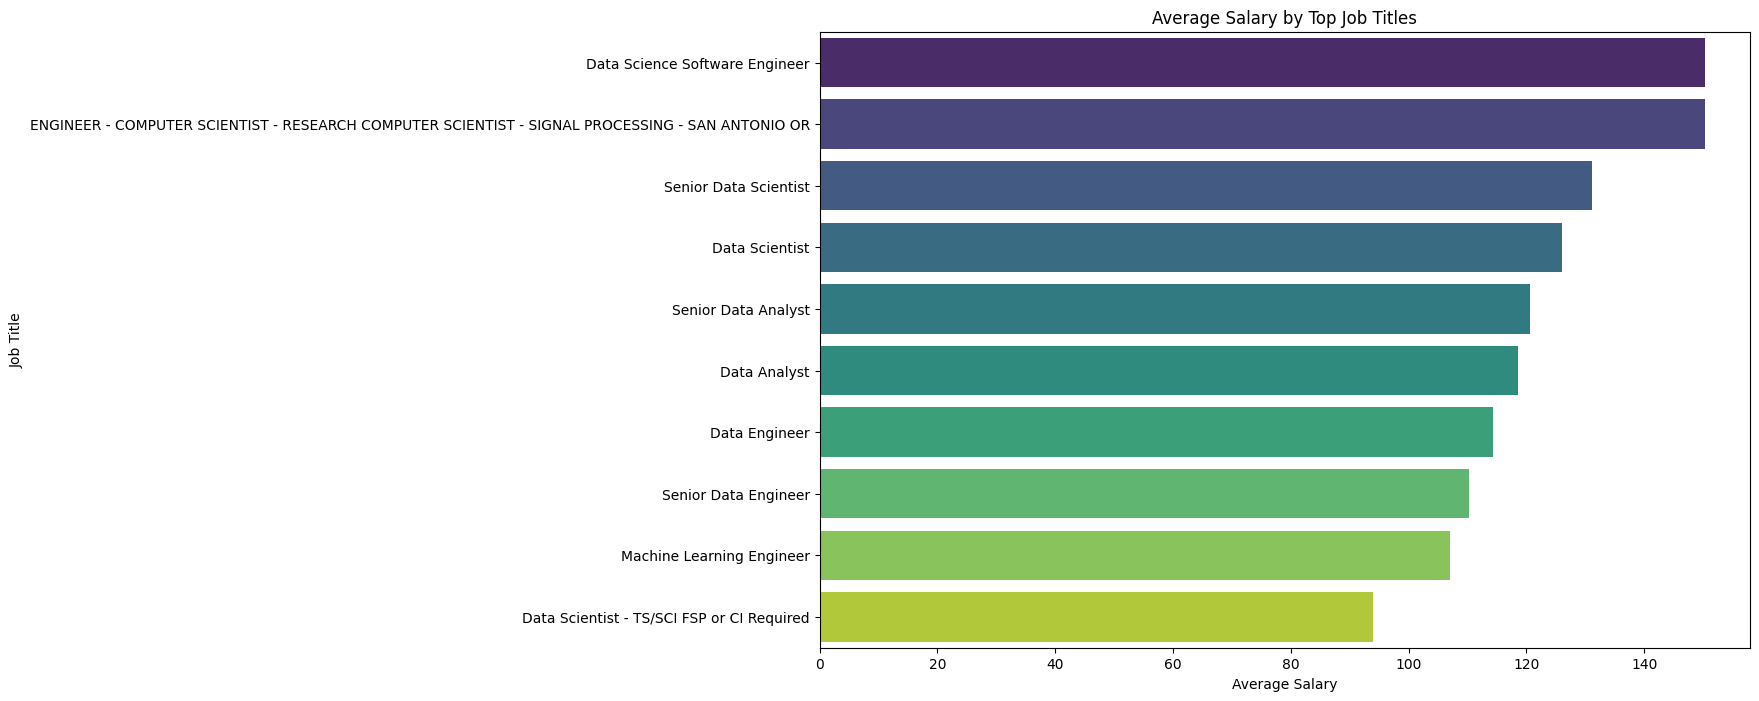

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the average salary for the top job titles
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_salary_by_job.values, y=avg_salary_by_job.index, palette='viridis')
plt.xlabel('Average Salary')
plt.ylabel('Job Title')
plt.title('Average Salary by Top Job Titles')
plt.show()
